In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('Telco_Customer_Churn_Dataset.csv')

In [3]:
# Clean 'TotalCharges' column (required for consistency)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", pd.NA))
df.dropna(subset=['TotalCharges'], inplace=True)

In [4]:
# Create tenure segments (bins)
bins = [0, 12, 24, 48, 60, df['tenure'].max()]
labels = ['0-12 months', '13-24 months', '25-48 months', '49-60 months', '60+ months']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Create MonthlyCharges segments (bins) using quartiles
df['MonthlyChargesGroup'] = pd.qcut(df['MonthlyCharges'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

Churn rate by Tenure Group:
Churn               No       Yes
TenureGroup                     
0-12 months   0.514577  0.485423
13-24 months  0.704871  0.295129
25-48 months  0.791256  0.208744
49-60 months  0.850000  0.150000
60+ months    0.917038  0.082962


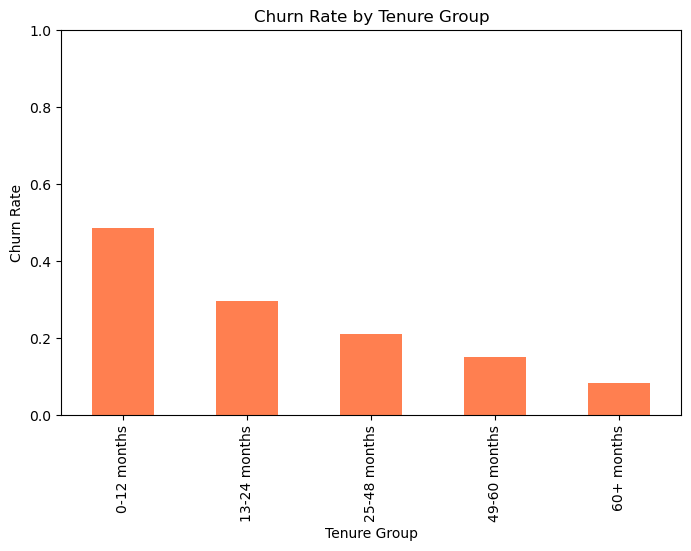

In [10]:
# 1. Churn rate by TenureGroup
tenure_churn = df.groupby('TenureGroup' ,observed=False)['Churn'].value_counts(normalize=True).unstack()
print("Churn rate by Tenure Group:")
print(tenure_churn)

plt.figure(figsize=(8,5))
tenure_churn['Yes'].plot(kind='bar', color='coral')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group')
plt.ylim(0,1)
plt.show()


Churn rate by Monthly Charges Group:
Churn                      No       Yes
MonthlyChargesGroup                    
Low                  0.886803  0.113197
Medium               0.754117  0.245883
High                 0.624501  0.375499
Very High            0.671217  0.328783


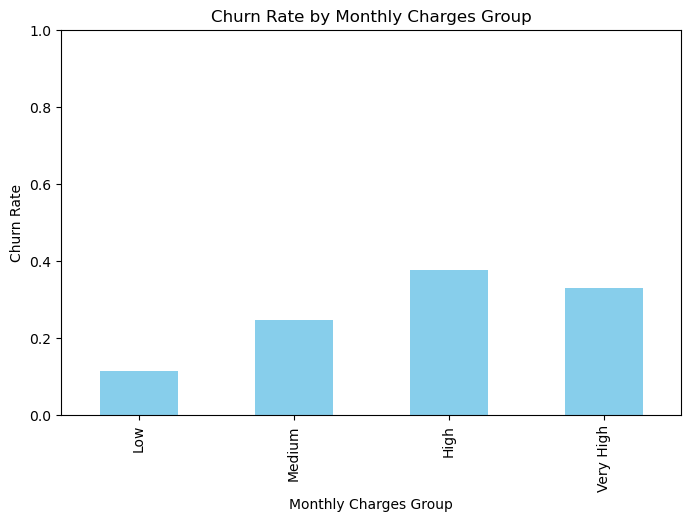

In [8]:
# 2. Churn rate by MonthlyChargesGroup
monthly_churn = df.groupby('MonthlyChargesGroup' ,observed=False)['Churn'].value_counts(normalize=True).unstack()
print("\nChurn rate by Monthly Charges Group:")
print(monthly_churn)

plt.figure(figsize=(8,5))
monthly_churn['Yes'].plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Monthly Charges Group')
plt.ylabel('Churn Rate')
plt.xlabel('Monthly Charges Group')
plt.ylim(0,1)
plt.show()


Churn rate by Contract Type:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


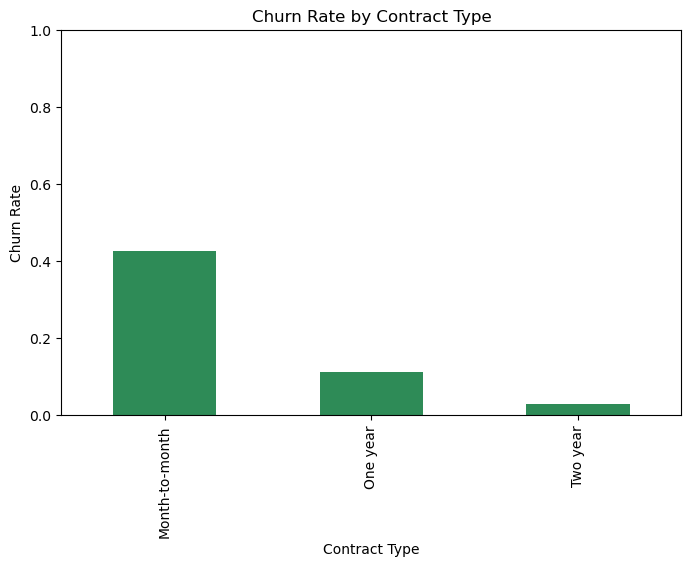

In [9]:
# 3. Churn rate by Contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn rate by Contract Type:")
print(contract_churn)

plt.figure(figsize=(8,5))
contract_churn['Yes'].plot(kind='bar', color='seagreen')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.ylim(0,1)
plt.show()